<a href="https://colab.research.google.com/github/DAG00DAG33/ML-Languages/blob/master/Keras/Keras_Dedos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import h5py
%matplotlib inline     
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
import time

In [2]:
from keras import layers
from keras.layers import Input, Dense , ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D
from keras.models import Model
from keras.models import model_from_json
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import optimizers

import keras.backend as K
K.set_image_data_format('channels_last')

# Activation

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
import sys
sys.path.insert(1, 'drive/My Drive/ML/iacmf')
PATH = 'drive/My Drive/ML/iacmf'

In [17]:
!ls 'drive/MyDrive/ML/iacmf'

ls: cannot access 'drive/MyDrive/iacmf': No such file or directory


In [18]:
!ls 'drive/MyDrive/ML/iacmf'

'Base de datos colores.ipynb'   herr.py			 __pycache__
'Base de datos.ipynb'	       'Lista de instalar.txt'	 suma2.h5
 b.py			       'Make database.ipynb'	 VideosAI.txt
 Fingers.ipynb		        Minimalista.ipynb
 fotos			        model


In [ ]:
from google.colab import files
files.upload()

{}

In [21]:
from herr import *

In [22]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import io
from PIL import Image

# Import Data

In [23]:
# 'Stuff/Dedos/datasets/train_signs.h5', 'Stuff/Dedos/datasets/test_signs.h5'
# 'fotos/dedosDataset2.h5', 'fotos/dedosDataset2.h5'
# 'fotos/suma.h5', 'fotos/suma.h5'
# 'fotos/miniData.h5', 'fotos/miniData.h5'
X_train, Y_train, X_test, Y_test = load_dataset(PATH +'/suma2.h5',PATH + '/suma2.h5')

In [24]:
Y_test.shape

(385, 6)

In [25]:
X_train[0]

array([[[0.71372549, 0.7254902 , 0.63921569],
        [0.7254902 , 0.7372549 , 0.77254902],
        [0.71764706, 0.7372549 , 0.77254902],
        ...,
        [0.60392157, 0.63529412, 0.68627451],
        [0.58431373, 0.63529412, 0.61960784],
        [0.59607843, 0.60392157, 0.63529412]],

       [[0.75294118, 0.78039216, 0.72941176],
        [0.74509804, 0.74901961, 0.74901961],
        [0.71764706, 0.76078431, 0.76862745],
        ...,
        [0.62745098, 0.63529412, 0.65490196],
        [0.61568627, 0.62745098, 0.66666667],
        [0.63137255, 0.63137255, 0.66666667]],

       [[0.7254902 , 0.78431373, 0.72941176],
        [0.7254902 , 0.75686275, 0.74117647],
        [0.72156863, 0.75686275, 0.76862745],
        ...,
        [0.61568627, 0.65098039, 0.69411765],
        [0.63529412, 0.63529412, 0.63529412],
        [0.61960784, 0.63137255, 0.63921569]],

       ...,

       [[0.56862745, 0.56862745, 0.56078431],
        [0.57647059, 0.57647059, 0.59607843],
        [0.59215686, 0

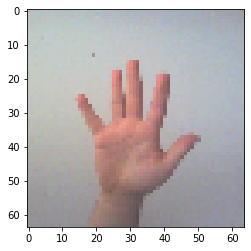

In [26]:
plt.imshow(X_train[0])

In [27]:
Y_train[0]

array([0., 0., 0., 0., 0., 1.])

# Model

In [28]:
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    
    
    X = BatchNormalization()(X_input)
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv0', padding='same', activation='relu')(X) 
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv00', padding='same', activation='relu')(X)


    
    X = MaxPooling2D((2, 2), name='max_pool0')(X)
    
    
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv1', padding='same', activation='relu')(X) 
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv11', padding='same', activation='relu')(X)


    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    
    
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2', padding='same', activation='relu')(X) 
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv22', padding='same', activation='relu')(X)
    
    
    
    X = MaxPooling2D((4, 4), name='max_pool2')(X)
    
    
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv3', padding='same', activation='relu')(X) 
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv33', padding='same', activation='relu')(X)
    
    
    X = MaxPooling2D((2, 2), name='max_pool3')(X)
    
    
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv4', padding='same', activation='relu')(X) 
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv44', padding='same', activation='relu')(X)

    
    X = Flatten()(X)
    X = Dense(6, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='SignModel')

    return model

In [29]:
finger_model = model(X_train.shape[1:]) 

In [30]:
finger_model.compile('adam', 'binary_crossentropy')#metrics=['accuracy']

In [31]:
print(finger_model.summary())

Model: "SignModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 3)         12        
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 16)        448       
_________________________________________________________________
conv00 (Conv2D)              (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 32, 32, 16)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 16)        2320      
_________________________________________________________________
conv11 (Conv2D)              (None, 32, 32, 32)        46

# Fit

In [32]:
history = finger_model.fit(X_train, Y_train, epochs=10, batch_size=20)#, validation_data=(X_test, Y_test)

Epoch 1/10
77/77 [==============================] - 8s 5ms/step - loss: 0.5401
Epoch 2/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3740
Epoch 3/10
77/77 [==============================] - 0s 5ms/step - loss: 0.2372
Epoch 4/10
77/77 [==============================] - 0s 5ms/step - loss: 0.1851
Epoch 5/10
77/77 [==============================] - 0s 4ms/step - loss: 0.1378
Epoch 6/10
77/77 [==============================] - 0s 4ms/step - loss: 0.0954
Epoch 7/10
77/77 [==============================] - 0s 4ms/step - loss: 0.0615
Epoch 8/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0468
Epoch 9/10
77/77 [==============================] - 0s 4ms/step - loss: 0.0352
Epoch 10/10
77/77 [==============================] - 0s 5ms/step - loss: 0.0411


Text(0.5, 0, 'epoch')

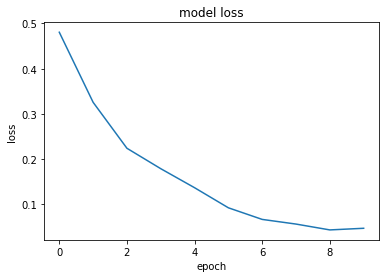

In [33]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# Evaluate


In [34]:
accuracy(finger_model, X_test, Y_test)

0.9324675324675324

# Use

In [35]:
def use(foto):
    predict = finger_model.predict(foto.reshape(1,64,64,3))  #Importante
    plt.imshow(foto)
    plt.show()
    print(predict)
    plt.plot(predict.reshape(6))
    plt.ylim((0,1))
    plt.show()

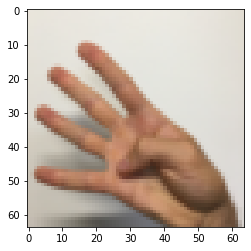

[[4.5238696e-07 1.9887616e-06 2.7019205e-04 4.6058785e-02 9.0898263e-01
  6.8730218e-03]]


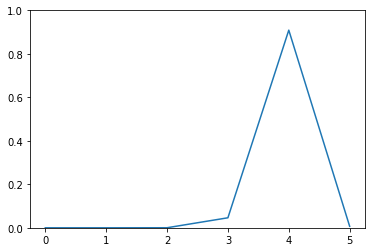

In [36]:
use(X_test[8])

In [37]:
Y_test[4]

array([0., 0., 0., 1., 0., 0.])

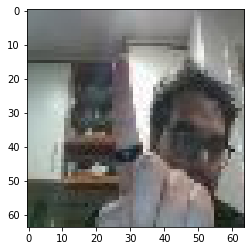

[[1.3096173e-05 3.6001299e-04 4.9456013e-03 8.8101065e-01 5.9375186e-02
  1.2539585e-04]]


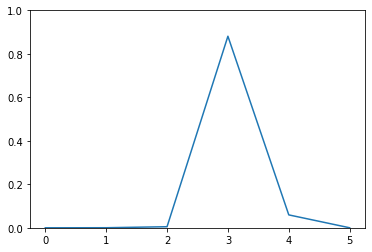

In [38]:
use(take_photo(size=(64,64))/255)


# Save the model

In [ ]:
# Guardar modelo en JSON
model_json = finger_model.to_json()
with open(PATH + "/model/model2.json", "w") as json_file:
    json_file.write(model_json)
# Guardar Weights
finger_model.save_weights(PATH + "/model/model2.h5")
print("Model saved")

Model saved


# Load the model

In [ ]:
# Cargar modelo
json_file = open(PATH + '/model/model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
finger_model = model_from_json(loaded_model_json)
# Cargar Weights
finger_model.load_weights(PATH + "/model/model2.h5")
print("Model loaded")

Model loaded


# Live

In [ ]:
#OFLINE

from IPython.display import clear_output
camera = cv2.VideoCapture(1)
for i in range(30):
    return_value, image = camera.read()
    resize_foto = process_foto(image)/255
    use(resize_foto)
    time.sleep(1)
    clear_output()
del(camera)

In [ ]:
#ONLINE
from IPython.display import clear_output
import time
for i in range(30):
    image = take_photo(size=(64,64))/255
    use(image)
    time.sleep(1)
    clear_output()
del(camera)

#Connect to arduino (OFLINE)

In [ ]:
import pyfirmata
placa = pyfirmata.Arduino('COM17')
rojo = placa.get_pin('d:11:o')
verde = placa.get_pin('d:10:o')
azul = placa.get_pin('d:9:o')


In [ ]:
#OFLINE
letters = ["r", "g", "b", "y", "o", "n"]

from IPython.display import clear_output
camera = cv2.VideoCapture(0)
for i in range(100):
    return_value, image = camera.read()
    resize_foto = process_foto2(image)/255
    Y_pred = finger_model.predict(resize_foto.reshape(1,224,224,3))
    pred = np.argmax(Y_pred, axis=-1)
    if Y_pred[0][pred]>0.8:
        
        clear_output()
        print(letters[pred[0]])
        
    time.sleep(0.5)
    
del(camera)

In [ ]:
#ONLINE

letters = ["r", "g", "b", "y", "o", "n"]

from IPython.display import clear_output
for i in range(100):
    image = take_photo(size=(64,64))/255
    Y_pred = finger_model.predict(image.reshape(1,64,64,3))
    pred = np.argmax(Y_pred, axis=-1)
    if Y_pred[0][pred]>0.8:
        clear_output()
        print(letters[pred[0]])


In [ ]:
from IPython.display import clear_output
camera = cv2.VideoCapture(0)
for i in range(300):
    return_value, image = camera.read()
    resize_foto = process_foto(image)/255
    Y_pred = finger_model.predict(resize_foto.reshape(1,64,64,3))
    pred = np.argmax(Y_pred, axis=-1)
    if Y_pred[0][pred]>0.8:
        
        clear_output()
        print(pred[0])
        opt = pred[0] #input("Escoge el color: \n")
        if opt==1:
                print ("ROJO")
                rojo.write(1)
                verde.write(0)
                azul.write(0)
        elif opt==2:
                print ("VERDE")
                rojo.write(0)
                verde.write(1)
                azul.write(0)
        elif opt==3:
                print ("AZUL")
                rojo.write(0)
                verde.write(0)
                azul.write(1)
        elif opt==0:
                print ("AZUL")
                rojo.write(0)
                verde.write(0)
                azul.write(1)
        elif opt==4:
                print ("Amarillo")
                rojo.write(1)
                verde.write(1)
                azul.write(0)
        elif opt==5:
                rojo.write(1)
                verde.write(1)
                azul.write(1)
                #placa.exit()
                #break
        else:
                print ("¡Seleccione un opción correcta!")
    time.sleep(0.5)
print("Fin")
del(camera)

In [ ]:
del(camera)